In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
df.shape

(506, 14)

In [6]:
df.describe(include = 'all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Preprocessing

1. Missing Values
2. Duplicates
3. TypeCasting
4. Zero Variance
5. Outlier treatment

## 1. Missing Values

In [7]:
 df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
df.fillna(df.mean(), inplace = True)

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 2. Duplicates

In [10]:
duplicate = df.duplicated()
sum(duplicate)

0

## 3. Type Casting

In [11]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## 4. Variance

In [12]:
df.var()
df.var() == 0
df.var(axis = 0) == 0

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

## 6. Outlier treatment

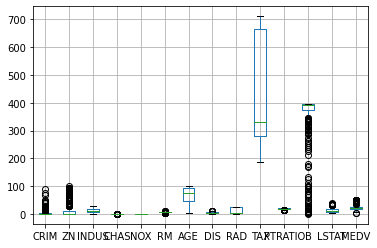

In [14]:
df.boxplot(figsize=(10, 20))

plt.show()


In [15]:
# Columns to check for outliers
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Function to replace outliers with imputed values
def impute_outliers(df, column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    upper_limit = Q3 + (IQR * 1.5)
    lower_limit = Q1 - (IQR * 1.5)
    
    # Replace outliers with imputed values
    df[column] = np.where((df[column] > upper_limit) | (df[column] < lower_limit), df[column].mean(), df[column])
    
    return df

# Impute outliers for each column
for column in columns:
    df = impute_outliers(df, column)

# Updated dataframe with outliers imputed
df_outliers_imputed = df

# Print the updated dataframe
print(df_outliers_imputed)


        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD    TAX   
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900  1.0  296.0  \
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050  1.0  273.0   

     PTRATIO       B      LSTAT  MEDV  

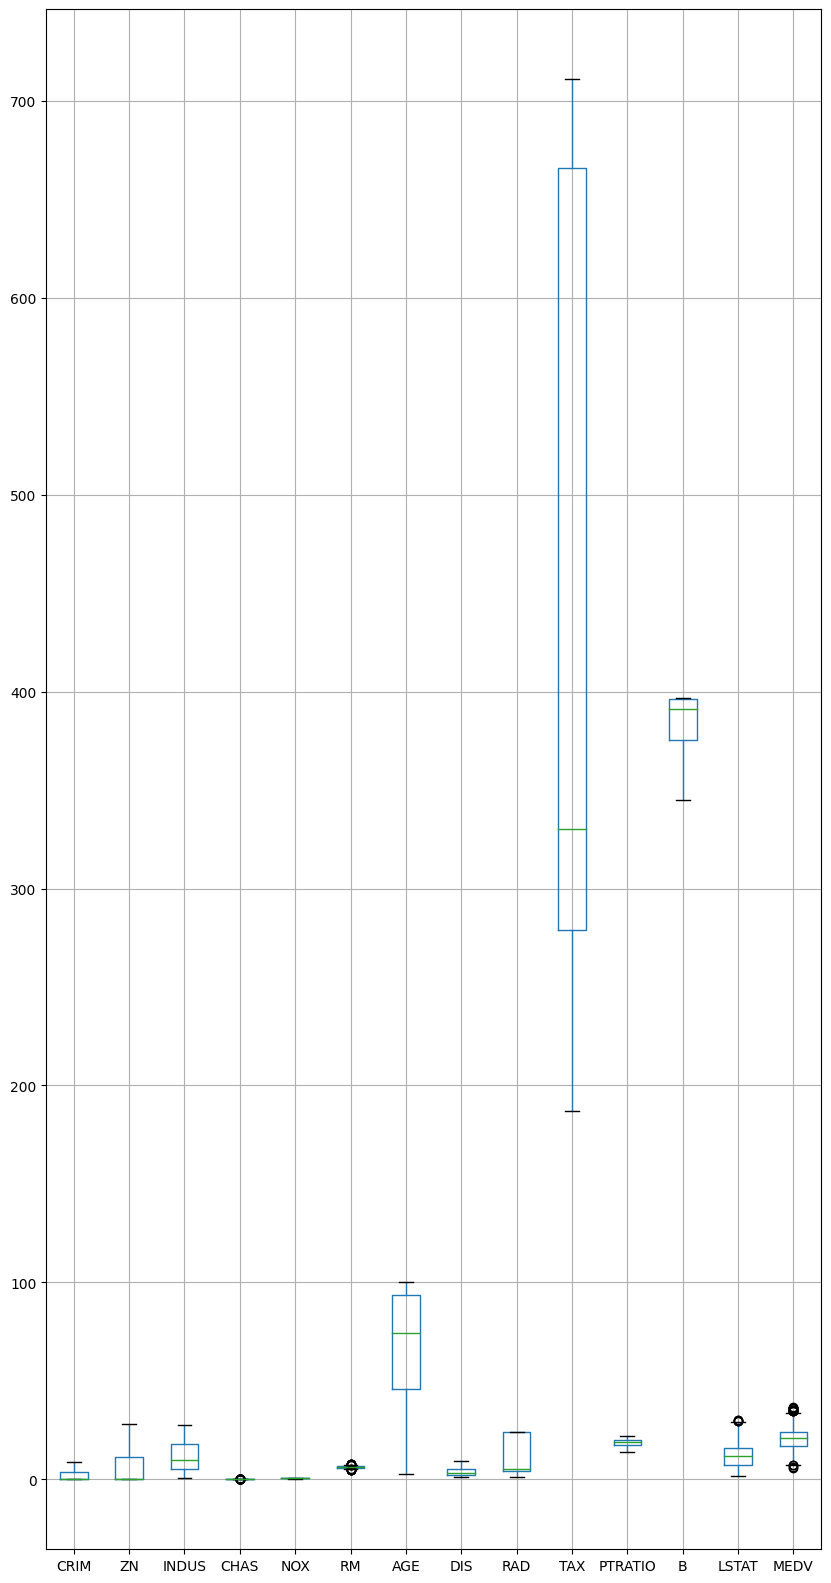

In [16]:
df.boxplot(figsize=(10, 20))

plt.show()

In [17]:
df.shape

(506, 14)

# Linear Regression

In [18]:
target_feature = 'MEDV'

In [19]:
# Splitting the Dataset
x = df.drop(target_feature, axis = 1)
y = df[target_feature]

In [20]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,12.715432


In [21]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

## Model training

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create an instance of a LinearRegression() model named 'regression'.
regression = LinearRegression()

## Fitting the Regression on training data

In [24]:
regression.fit(x_train, y_train) # Model is being trained

LinearRegression()

## Train accuracy score

In [25]:
regression.score(x_train, y_train)

0.6734558019081737

## Test accuracy score

In [26]:
regression.score(x_test, y_test)

0.5527607323209587

In [27]:
# Make predictions on the test data
y_pred = regression.predict(x_test)
y_pred

array([24.66600573, 17.66559715, 24.4243758 , 12.22182652, 21.05861729,
       21.07715046, 17.3599357 , 22.31341137, 18.00212898, 20.58883082,
       12.71860485, 15.24630449, 14.8294304 , 12.69109386, 26.11083535,
       28.56324917, 18.78540738, 28.91444345, 27.70919347, 22.88768926,
       24.45910228, 19.53824765, 19.73605983, 26.69051357, 22.68306852,
       17.15915957, 19.14040731, 17.43193221, 26.04145747, 19.29234059,
       15.09947921, 16.26386725, 20.41109717, 22.4743836 , 25.02598836,
       14.75509288, 12.13955177, 17.51733208, 15.51270028, 12.75069695,
       24.78983057, 21.83515815, 22.67714237, 12.09101305, 24.34162822,
       24.2681697 , 20.3121383 , 19.8395044 , 11.95103194, 23.25054314,
       20.80369291, 18.84549858, 21.79555444, 24.74490407, 14.41835335,
       21.44500351, 21.6029849 , 19.0298042 , 15.70331798, 20.10828638,
       23.89315197, 21.82583188, 28.80423002, 27.70613786, 15.9237395 ,
       27.44670716, 16.49473217, 19.90115264, 16.36090794, 22.88

In [28]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

12.996257585152808

In [29]:
# Calculate the coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)
r2

0.5527607323209587

## Scatter Plot

Text(0, 0.5, 'y_pred')

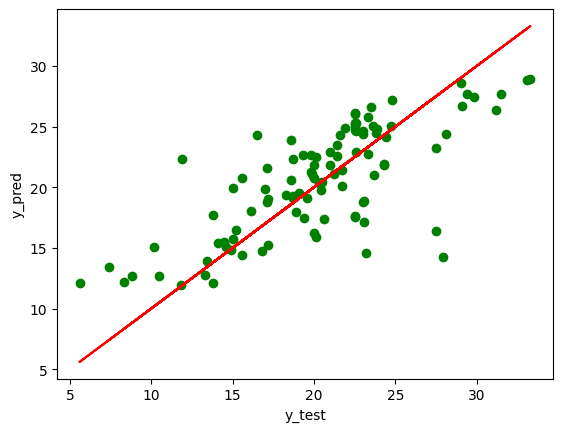

In [30]:
plt.scatter(y_test, y_pred ,color = 'green') # both x and y must be of same size
plt.plot(y_test, y_test, "r")
plt.xlabel('y_test')
plt.ylabel('y_pred')


In [31]:
df1 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Variance':y_test - y_pred})
df1

,Actual,Predicted,Variance
329,22.600000,24.666006,-2.066006
371,22.532806,17.665597,4.867209
219,23.000000,24.424376,-1.424376
403,8.300000,12.221827,-3.921827
78,21.200000,21.058617,0.141383
...,...,...,...
56,24.700000,25.013804,-0.313804
455,14.100000,15.436160,-1.336160
60,18.700000,19.125834,-0.425834
213,28.100000,24.351382,3.748618


In [34]:
lr_coefficient = pd.DataFrame()

lr_coefficient["columns"] = x_train.columns
lr_coefficient['Coefficient Estimate'] = pd.Series(regression.coef_)
print(lr_coefficient)

    columns  Coefficient Estimate
0      CRIM              0.068263
1        ZN              0.001579
2     INDUS             -0.074188
3      CHAS             12.006007
4       NOX             -3.350874
5        RM              3.326956
6       AGE             -0.025860
7       DIS             -0.392650
8       RAD             -0.027544
9       TAX             -0.007319
10  PTRATIO             -0.427837
11        B              0.029078
12    LSTAT             -0.306599


## Visualize - violin plot

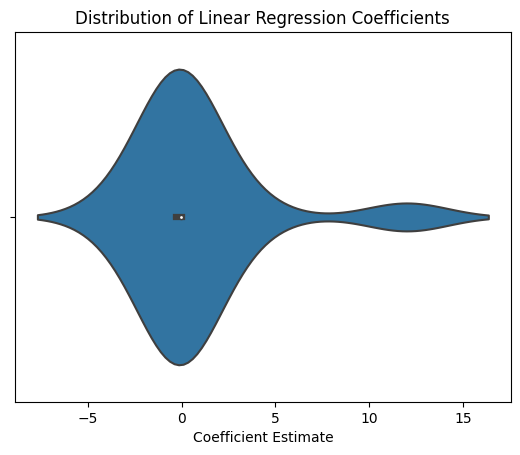

In [35]:
sns.violinplot(x = lr_coefficient['Coefficient Estimate'])

plt.xlabel('Coefficient Estimate')

plt.title('Distribution of Linear Regression Coefficients')
plt.show()